This is artificial recurrent neural network called Long Short Term Memory (LSTM)  used to predict closing stock  price of MSFT (microsoft)

In [75]:
# importing  libraries
import pandas as pd
import numpy as np
from math import ceil
import matplotlib.pyplot as plt
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
plt.style.use("fivethirtyeight")

In [54]:
# getting the data
df=web.DataReader("MSFT",data_source="yahoo",start="1986-03-13",end="2021-05-13")

In [55]:
# displaying the data
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1986-03-13,0.101563,0.088542,0.088542,0.097222,1.031789e+09,0.061491
1986-03-14,0.102431,0.097222,0.097222,0.100694,3.081600e+08,0.063687
1986-03-17,0.103299,0.100694,0.100694,0.102431,1.331712e+08,0.064785
1986-03-18,0.103299,0.098958,0.102431,0.099826,6.776640e+07,0.063138
1986-03-19,0.100694,0.097222,0.099826,0.098090,4.789440e+07,0.062040


In [56]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-05-07,254.300003,251.169998,252.149994,252.460007,27032900.0,251.397110
2021-05-10,251.729996,247.119995,250.869995,247.179993,29299900.0,246.139343
2021-05-11,246.600006,242.570007,244.550003,246.229996,33641600.0,245.193329
2021-05-12,244.380005,238.070007,242.169998,239.000000,36684400.0,237.993790
2021-05-13,245.600006,241.419998,241.800003,243.029999,29624300.0,242.006805


In [57]:
# checking the shape of data
df.shape

(8865, 6)

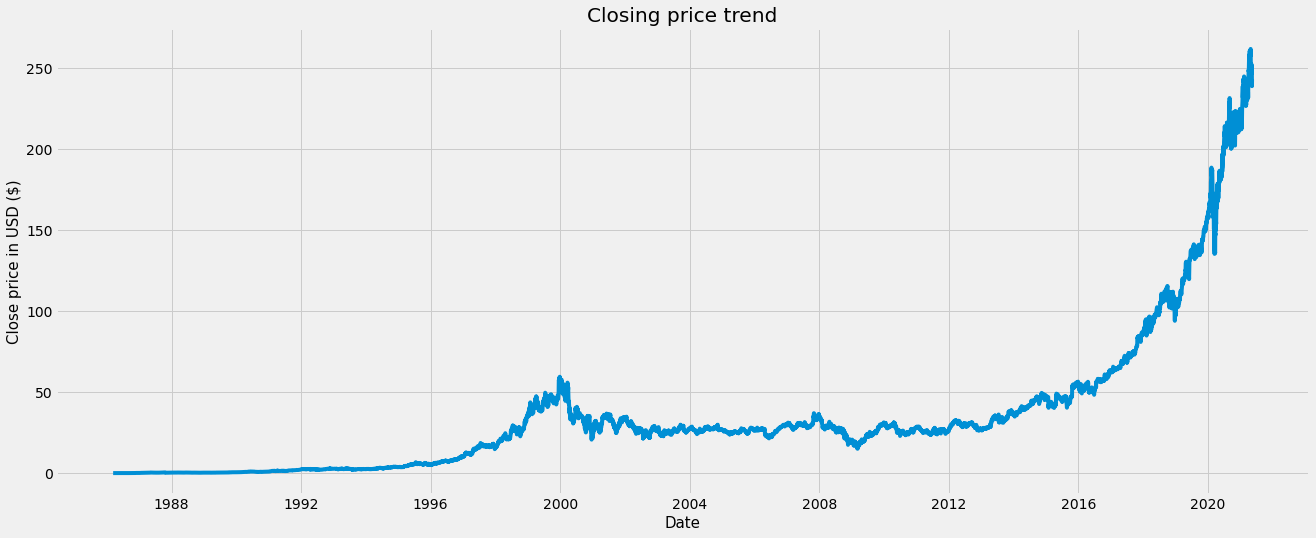

In [58]:
# visualize the close price history
plt.figure(figsize=(20,8))
plt.title("Closing price trend")
plt.plot(df["Close"])
plt.xlabel("Date",fontsize=15)
plt.ylabel("Close price in USD ($)",fontsize=15)
plt.show()

In [59]:
# creating dataframe of close_column
data=df.filter(["Close"])
dataset=data.values
dataset

array([[9.72220004e-02],
       [1.00694001e-01],
       [1.02430999e-01],
       ...,
       [2.46229996e+02],
       [2.39000000e+02],
       [2.43029999e+02]])

In [60]:
# getting no of rows to train the model on 
training_data_len=ceil(len(dataset) * 0.8)
training_data_len

7092

In [61]:
# scaling the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [62]:
# training dataset
train_data=scaled_data[0:training_data_len,:]
# splitdata to x_train,y_train
X_train=[]
y_train=[]
for i in range(100,len(train_data)):
  X_train.append(train_data[i-100:i,0])
  y_train.append(train_data[i,0])
  if i<=100:
    print(X_train)
    print(y_train)
    print()

[array([2.65159923e-05, 3.97739884e-05, 4.64067989e-05, 3.64594894e-05,
       2.98304913e-05, 1.98869942e-05, 9.94349711e-06, 0.00000000e+00,
       6.62899807e-06, 1.65724952e-05, 2.32014933e-05, 1.98869942e-05,
       1.65724952e-05, 1.98869942e-05, 2.32014933e-05, 2.32014933e-05,
       1.65724952e-05, 1.98869942e-05, 2.65159923e-05, 2.98304913e-05,
       3.64594894e-05, 3.97739884e-05, 3.97739884e-05, 5.30357969e-05,
       5.63502960e-05, 4.30922998e-05, 4.30922998e-05, 3.64594894e-05,
       3.81167247e-05, 7.62372902e-05, 1.02757095e-04, 1.06071594e-04,
       9.28097854e-05, 8.28662882e-05, 7.62372902e-05, 7.62372902e-05,
       7.29227911e-05, 7.62372902e-05, 7.62372902e-05, 7.95517892e-05,
       7.62372902e-05, 7.95517892e-05, 8.28662882e-05, 7.95517892e-05,
       7.95517892e-05, 8.28662882e-05, 7.62372902e-05, 7.29227911e-05,
       6.62937931e-05, 6.62937931e-05, 6.62937931e-05, 7.95517892e-05,
       9.28097854e-05, 1.02757095e-04, 1.19329590e-04, 1.06071594e-04,
     

In [70]:
#convert X_train,y_train to np array
X_train,y_train=np.array(X_train),np.array(y_train)

In [72]:
# reshape the data
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(6992, 100, 1)

In [67]:
y_train.shape

(6992,)

In [76]:
# building LSTM layer
model=Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(100,return_sequences=False))
model.add(Dense(50))
model.add(Dense(1))

In [77]:
# compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [78]:
model.fit(X_train,y_train,batch_size=1,epochs=1)

6992/6992 [==============================] - 203s 28ms/step - loss: 5.1846e-05


In [87]:
# creating_test_set
test_data=scaled_data[training_data_len-100:,:]
# creating x_test,y_test
X_test=[]
y_test=dataset[training_data_len:,:]
for i in range(100,len(test_data)):
  X_test.append(test_data[i-100:i,0])

In [88]:
# convert to array
X_test=np.array(X_test)

In [90]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [91]:
# get the models predicted price
predictions=model.predict(X_test)
predictions=scaler.inverse_transform(predictions)

In [94]:
# get the rmse
rmse =np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

7.943875722363229

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


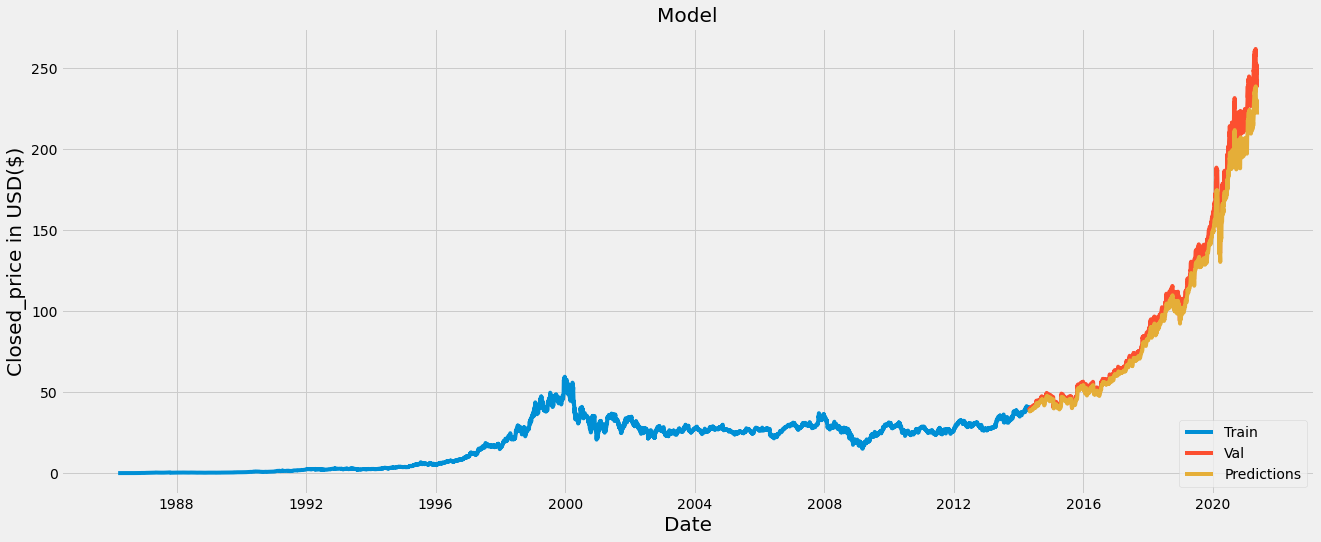

In [98]:
# poltting data
train=data[:training_data_len]
valid=data[training_data_len:]
valid["predictions"]=predictions
# visualizing
plt.figure(figsize=(20,8))
plt.title("Model")
plt.xlabel('Date',fontsize=20)
plt.ylabel('Closed_price in USD($)',fontsize=20)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [99]:
# cross verifying through report
valid

,Close,predictions
Date,,
2014-04-30,40.400002,39.351109
2014-05-01,40.000000,39.279655
2014-05-02,39.689999,39.011726
2014-05-05,39.430000,38.710167
2014-05-06,39.060001,38.444004
...,...,...
2021-05-07,252.460007,227.766068
2021-05-10,247.179993,230.323090
2021-05-11,246.229996,228.200958
